# Load packages

In [20]:
from sklearn import datasets, model_selection ## basig dataset and model selection tools
from sklearn.dummy import DummyClassifier ## first classifier model
from sklearn.ensemble import HistGradientBoostingClassifier as HGBC ## GB classifier model
import matplotlib.pyplot as plt ## need for visualisations

# Load in iris dataset and check how it looks

In [5]:
iris = datasets.load_iris()

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

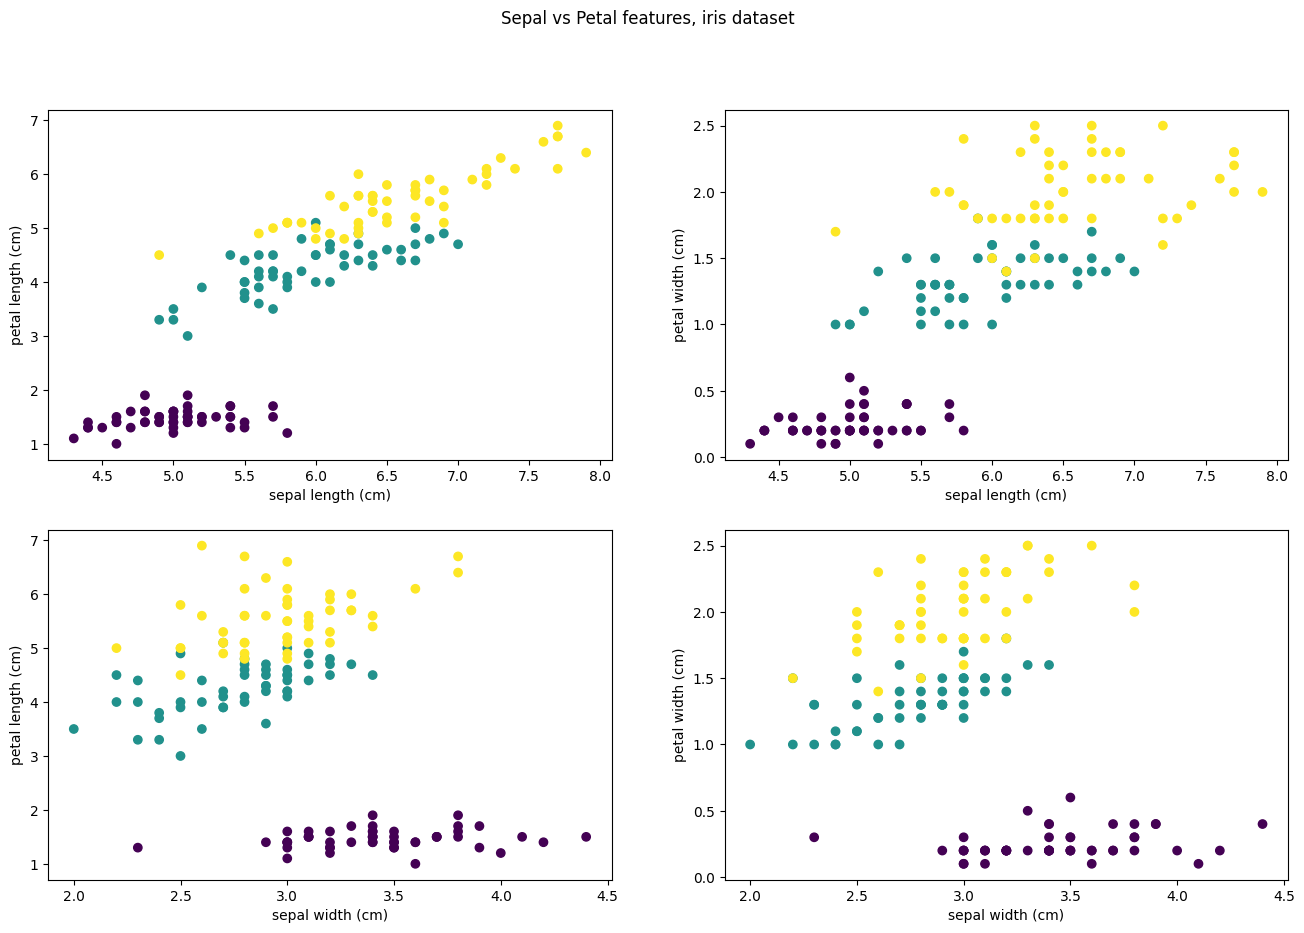

In [17]:
## just plotting sepal featured against petal features

X = iris.data
y = iris.target

figure = plt.figure(figsize = (16,10))
plt.suptitle('Sepal vs Petal features, iris dataset')
i_plot = 1

for i_x in range(2):

    for i_y in range(2,4):

        ax = figure.add_subplot(2,2,i_plot)
        ax.scatter(X[:,i_x], X[:,i_y], c = y)
        ax.set_xlabel(iris.feature_names[i_x])
        ax.set_ylabel(iris.feature_names[i_y])

        i_plot+=1
    


# Perfrom dummy classification 

In [29]:
##Initialise model
dummy_clf = DummyClassifier()

## Seems like permutation test needs some cross validation so intialise a simple KFold with 10% of the n_samples (150) splits
cv = model_selection.KFold(15, shuffle=True)

## Perform permutation test using accuracy as a standard classification problem scoring
score_dummy, perm_scores_dummy, pvalue_dummy = model_selection.permutation_test_score(\
    dummy_clf, X, y, scoring="accuracy", cv=cv
)



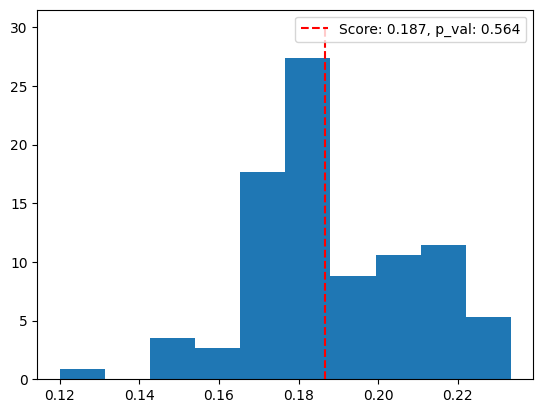

In [36]:
plt.hist(perm_scores_dummy, bins = 10, density = True)
plt.vlines(score_dummy, 0, 30, linestyle= '--', color='r', label = 'Score: %.3f, p_val: %.3f'%(score_dummy, pvalue_dummy))
plt.legend()

### We obtain a p value of 0.564 indicating a lack of dependency between features and targets as identified by the dummy classifier (higher p value indicates a larger fraction of randomized data where the classifier performs as well/better than for the original data). Hence, the classification obtained by the Dummy Classifier on the iris dataset might as well be by chance.

# Do same but with HistGradientBoostingClassifier

In [37]:
##Initialise model
hgbc_clf = HGBC()

## Intialise a simple KFold with 10% of the n_samples (150) splits
cv = model_selection.KFold(15, shuffle=True)

## Perform permutation test using accruacy as a standard classification problem scoring
score_hgbc, perm_scores_hgbc, pvalue_hgbc = model_selection.permutation_test_score(\
    hgbc_clf, X, y, scoring="accuracy", cv=cv
)


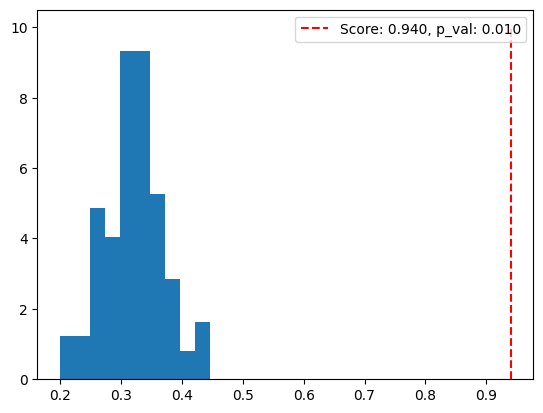

In [39]:
plt.hist(perm_scores_hgbc, bins = 10, density = True)
plt.vlines(score_hgbc, 0, 10, linestyle= '--', color='r', label = 'Score: %.3f, p_val: %.3f'%(score_hgbc, pvalue_hgbc))
plt.legend()

### HistGradientBoostingClassifier yields a very low p vlaue (0.010), with the original score being much higher than the score on randomized, permuted data. Hence, it is able to identify a dependency between feature and target and there is low likelihood that its classification is due to chance

# Conclusion

## 1) There is a significant statistical association between the iris type and the input features (petal and sepal width and length)

## 2) The HistGradientBoostingClassifier is able to identify this association and classify accordingly. The Dummy Classifier on the other hand was unable to identify this association and its classification was as good as by chance.
